downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


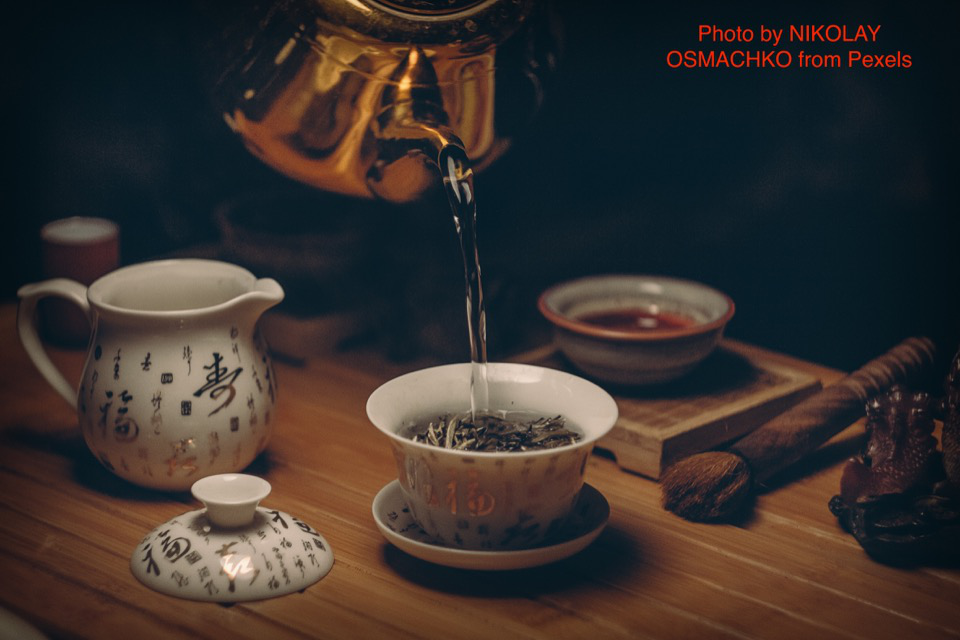

In [61]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from tqdm import tqdm, tqdm_notebook

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-2.18569767e-08]]
[[-2.45345291e-08]]
[[-2.19079084e-08]]
[[-2.42143869e-08]]
[[-2.49710865e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


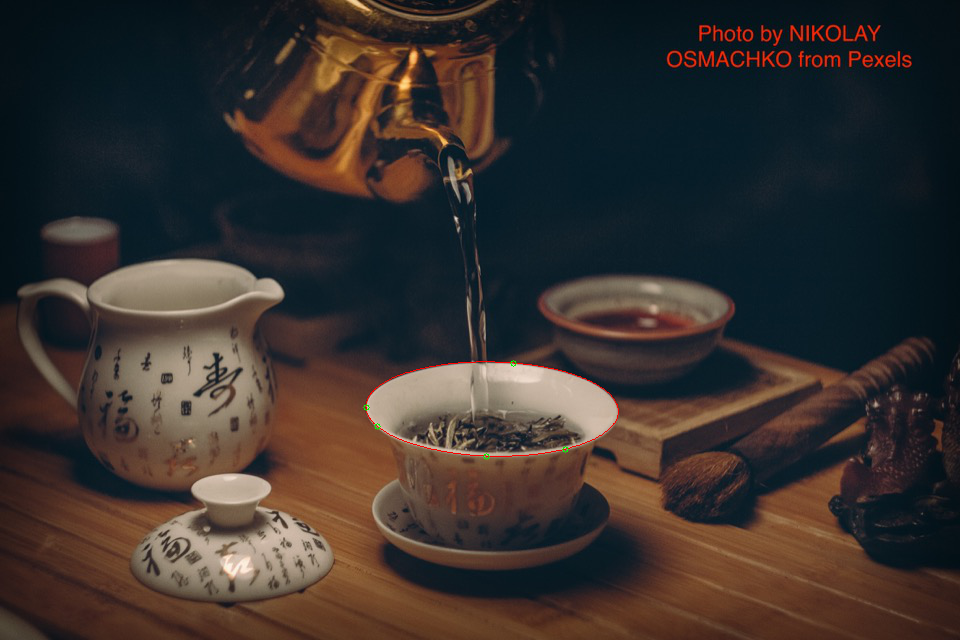

In [2]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

# 6-point


[[ 1.00000000e+00 -1.41770870e-01 -4.34239653e+02]
 [-1.41770870e-01  7.15705975e+00 -2.85789050e+03]
 [-4.34239653e+02 -2.85789050e+03  1.36691006e+06]]
Ellipse 
[[2.60668945]]
[[-1.58582269]]
[[-3.14604868]]
[[1.9645552]]
[[-1.3071412]]
[[1.46778761]]
u =  [[-3.17677640e-04  6.51687765e-01  7.58487281e-01]
 [-2.09076394e-03 -7.58486095e-01  6.51685870e-01]
 [ 9.99997764e-01 -1.37879182e-03  1.60347935e-03]]
m1v.T =  [[-3.17677640e-04  6.51687765e-01  7.58487281e-01]
 [-2.09076394e-03 -7.58486095e-01  6.51685870e-01]
 [ 9.99997764e-01 -1.37879182e-03  1.60347935e-03]]
v =  [[-3.17677640e-04 -2.09076394e-03  9.99997764e-01]
 [ 6.51687765e-01 -7.58486095e-01 -1.37879182e-03]
 [-7.58487281e-01 -6.51685870e-01 -1.60347935e-03]]
usv =  [[ 1.00000000e+00 -1.41770870e-01 -4.34239653e+02]
 [-1.41770870e-01  7.15705975e+00 -2.85789050e+03]
 [-4.34239653e+02 -2.85789050e+03  1.36691006e+06]]


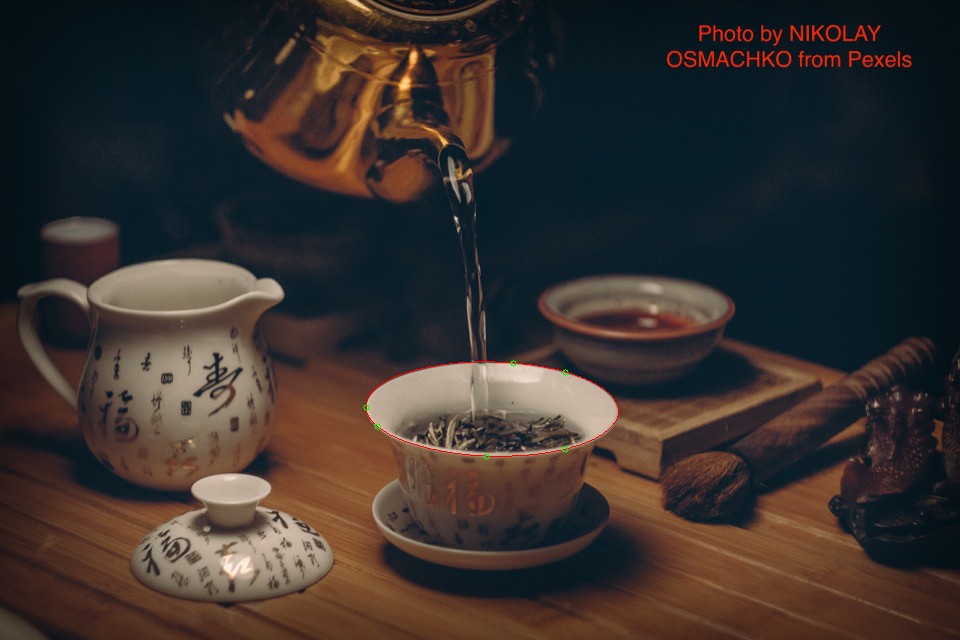

In [3]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [565, 372] ], np.double)

m = np.zeros((6,6))
r = np.zeros((6,1))

for k in range(0, len(points)):
  m[k][0] = points[k][0]*points[k][0]
  m[k][1] = 2*points[k][0]*points[k][1]
  m[k][2] = points[k][1]*points[k][1]
  m[k][3] = 2*points[k][0]
  m[k][4] = 2*points[k][1]
  m[k][5] = 1
  # r[k] = points[k][0]*points[k][0]
  
# p = -np.matmul(np.linalg.inv(m), r)

# u, s, v = np.linalg.svd(E)
# u2 = np.matmul(u, np.diag(np.sqrt(s)) )
# H = np.linalg.inv( u2.T)

mu, ms, mv = np.linalg.svd(m) 
# print(mu.shape, ms.shape, mv.shape)
# print(mv)
p = mv[-1, :] # last row of mv
# R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
p /= p[0]
# p = 
E = np.array(
          [[p[0], p[1], p[3]],
          [p[1], p[2], p[4]],
          [p[3], p[4], p[5]] ], np.double )

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
# E = np.array(
#       [[  1, p[0], p[2]],
#       [p[0], p[1], p[3]],
#       [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

# Errors 5


[[ 1.00000000e+00 -4.46446329e-02 -4.91411710e+02]
 [-4.46446329e-02  1.10197416e+01 -4.48157195e+03]
 [-4.91411710e+02 -4.48157195e+03  2.06212285e+06]]
Ellipse 
[[-1.80007191e-08]]
[[-2.55240593e-08]]
[[-1.99579517e-08]]
[[-2.61061359e-08]]
[[-3.01224645e-08]]
u =  [[-2.38302160e-04  6.41993531e-01  7.66710017e-01]
 [-2.17327680e-03 -7.66708560e-01  6.41991636e-01]
 [ 9.99997610e-01 -1.51328510e-03  1.57793795e-03]]
m1v.T =  [[-2.38302160e-04  6.41993531e-01  7.66710017e-01]
 [-2.17327680e-03 -7.66708560e-01  6.41991636e-01]
 [ 9.99997610e-01 -1.51328510e-03  1.57793795e-03]]
v =  [[-2.38302160e-04 -2.17327680e-03  9.99997610e-01]
 [ 6.41993531e-01 -7.66708560e-01 -1.51328510e-03]
 [-7.66710017e-01 -6.41991636e-01 -1.57793795e-03]]
usv =  [[ 1.00000000e+00 -4.46446329e-02 -4.91411710e+02]
 [-4.46446329e-02  1.10197416e+01 -4.48157195e+03]
 [-4.91411710e+02 -4.48157195e+03  2.06212285e+06]]


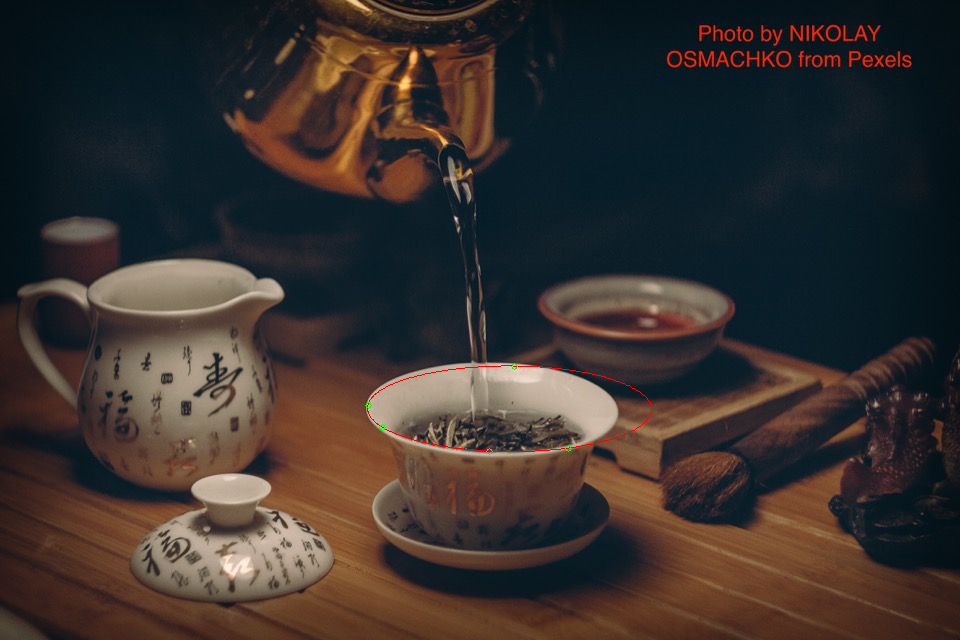

In [4]:
img = imgc.copy()

points = np.array([ [366 + 2, 407 - 2], [513 + 1, 363 + 3], [377 + 5, 426 + 1], [486+3, 456-5], [565+3, 449-1] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

# Errors 6

[[ 1.00000000e+00 -4.31163414e-01 -3.14635942e+02]
 [-4.31163414e-01  8.14507715e+00 -3.11631211e+03]
 [-3.14635942e+02 -3.11631211e+03  1.41222384e+06]]
Ellipse 
[[-661.93537001]]
[[691.20746877]]
[[861.62996274]]
[[-742.49499913]]
[[524.18817988]]
[[-670.51767925]]
u =  [[-2.22792509e-04  6.52414966e-01  7.57861902e-01]
 [-2.20666647e-03 -7.57860397e-01  6.52413021e-01]
 [ 9.99997540e-01 -1.52699572e-03  1.60850785e-03]]
m1v.T =  [[-2.22792509e-04  6.52414966e-01  7.57861902e-01]
 [-2.20666647e-03 -7.57860397e-01  6.52413021e-01]
 [ 9.99997540e-01 -1.52699572e-03  1.60850785e-03]]
v =  [[-2.22792509e-04 -2.20666647e-03  9.99997540e-01]
 [ 6.52414966e-01 -7.57860397e-01 -1.52699572e-03]
 [-7.57861902e-01 -6.52413021e-01 -1.60850785e-03]]
usv =  [[ 1.00000000e+00 -4.31163414e-01 -3.14635942e+02]
 [-4.31163414e-01  8.14507715e+00 -3.11631211e+03]
 [-3.14635942e+02 -3.11631211e+03  1.41222384e+06]]


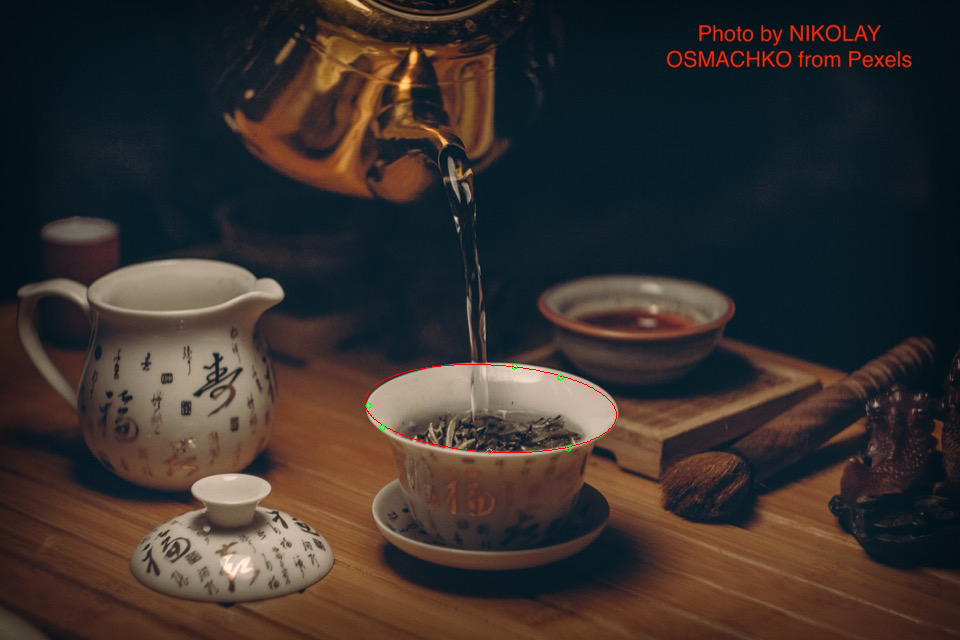

In [5]:
img = imgc.copy()

points = np.array([  [366 + 2, 407 - 2], [513 + 1, 363 + 3], [377 + 5, 426 + 1], [486+3, 456-5], [565+3, 449-1], [565 - 5, 372 + 5] ], np.double)

m = np.zeros((6,6))
r = np.zeros((6,1))

for k in range(0, len(points)):
  m[k][0] = points[k][0]*points[k][0]
  m[k][1] = 2*points[k][0]*points[k][1]
  m[k][2] = points[k][1]*points[k][1]
  m[k][3] = 2*points[k][0]
  m[k][4] = 2*points[k][1]
  m[k][5] = 1
  # r[k] = points[k][0]*points[k][0]
  
# p = -np.matmul(np.linalg.inv(m), r)

# u, s, v = np.linalg.svd(E)
# u2 = np.matmul(u, np.diag(np.sqrt(s)) )
# H = np.linalg.inv( u2.T)

mu, ms, mv = np.linalg.svd(m) 
# print(mu.shape, ms.shape, mv.shape)
# print(mv)
p = mv[-1, :] # last row of mv
# R[0]=A R[1]=H R[2]=B R[3]=G R[4]=F R[5]=C
p /= p[0]
# p = 
E = np.array(
          [[p[0], p[1], p[3]],
          [p[1], p[2], p[4]],
          [p[3], p[4], p[5]] ], np.double )

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
# E = np.array(
#       [[  1, p[0], p[2]],
#       [p[0], p[1], p[3]],
#       [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

In [0]:
def GetTrueEllipse():
  img = imgc.copy()

  points = np.array([  [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [565, 372] ], np.double)

  m = np.zeros((6,6))
  r = np.zeros((6,1))

  for k in range(0, len(points)):
    m[k][0] = points[k][0]*points[k][0]
    m[k][1] = 2*points[k][0]*points[k][1]
    m[k][2] = points[k][1]*points[k][1]
    m[k][3] = 2*points[k][0]
    m[k][4] = 2*points[k][1]
    m[k][5] = 1

  mu, ms, mv = np.linalg.svd(m) 
  p = mv[-1, :] # last row of mv
  p /= p[0]
  E = np.array(
            [[p[0], p[1], p[3]],
            [p[1], p[2], p[4]],
            [p[3], p[4], p[5]] ], np.double )


  print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)) )
  H = np.linalg.inv( u2.T)


  # draw ellipse
  true_elipse = []
  for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)
    true_elipse.append([a1[0],a1[1]])
    # print(a1, a2)
    
  for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]), int(points[k][1])),3,(0,255,0))

  # cv2_imshow(img)
  return np.array(true_elipse)

In [47]:
 true_elipse = GetTrueEllipse()[:,:,0]

Ellipse 


In [0]:
def GeteEllipse(noise):
  img = imgc.copy()

  points = np.array([  [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [565, 372] ], np.double) + noise

  m = np.zeros((6,6))
  r = np.zeros((6,1))

  for k in range(0, len(points)):
    m[k][0] = points[k][0]*points[k][0]
    m[k][1] = 2*points[k][0]*points[k][1]
    m[k][2] = points[k][1]*points[k][1]
    m[k][3] = 2*points[k][0]
    m[k][4] = 2*points[k][1]
    m[k][5] = 1

  mu, ms, mv = np.linalg.svd(m) 
  p = mv[-1, :] # last row of mv
  p /= p[0]
  E = np.array(
            [[p[0], p[1], p[3]],
            [p[1], p[2], p[4]],
            [p[3], p[4], p[5]] ], np.double )


  # print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

  u, s, v = np.linalg.svd(E)
  u2 = np.matmul(u, np.diag(np.sqrt(s)) )
  H = np.linalg.inv( u2.T)


  # draw ellipse
  true_elipse = []
  for alpha in range(0,360):
    a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
    a1 = (a1/a1[2])
    a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
    a2 = (a2/a2[2])
    cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)
    true_elipse.append([a1[0],a1[1]])
    # print(a1, a2)
    
  for k in range(0, len(points)):
    cv2.circle(img, (int(points[k][0]), int(points[k][1])),3,(0,255,0))

  # cv2_imshow(img)
  return np.array(true_elipse)

In [0]:
def get_max_dist(curren_ellipse, true_elipse):
  def dist(d1, d2):
    return np.sqrt((d1[0] - d2[0]) ** 2 + (d1[1] - d2[1]) ** 2)
  res = max([dist(curren_ellipse[idx], true_elipse[idx]) for idx in range(curren_ellipse.shape[0])])
  return res
    

In [84]:
np.random.seed(12324)
n = 1000
sigmas = range(1, 21)
diviations = []
for sigma in sigmas:
  dist = []
  for iter in tqdm_notebook(range(n)):
    noise = np.random.normal(size=(6, 2), loc=0., scale=sigma)
    curren_ellipse = GeteEllipse(noise)[:,:,0]
    dist.append(get_max_dist(curren_ellipse, true_elipse))
  diviations.append(np.mean(dist))

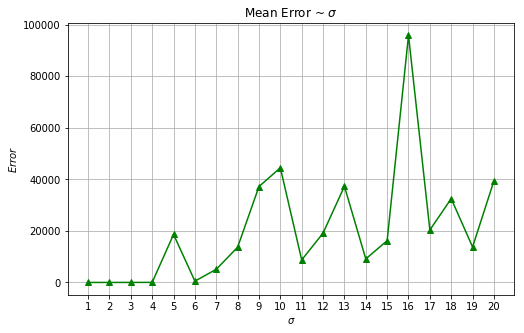

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(sigmas, diviations, c='green')
plt.plot(sigmas, diviations, '^', c='green')
plt.title('Mean Error ~ $ \sigma $')
plt.xlabel('$ \sigma $')
plt.ylabel('$Error$')
plt.xticks(sigmas)
plt.grid()
plt.show()

In [83]:
diviations

[4.860821907835447,
 9.871473440006364,
 16.040741356317668,
 23.962782389618617,
 18635.72002892653,
 514.2119824089602,
 5105.651244001197,
 13689.40719288522,
 37213.276394997185,
 44487.4461784183,
 8726.450167135004,
 19146.592299787593,
 37291.33160920349,
 9132.455601364922,
 16214.572538556127,
 95864.14610833555,
 20352.72366234852,
 32506.961404312788,
 13766.135659001167]